In [1]:
import os
os.chdir("C:/Users/Kali Prasad/Desktop/dataset/dataset")

In [17]:
import pandas as pd
import numpy as np 
import itertools
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
#Intialize the model
model=Sequential()

In [4]:
# Add Convolution Layer
model.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation="relu"))

In [5]:
model.add(Convolution2D(64,(3,3),input_shape=(224,224,3),activation="relu"))

In [6]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [7]:
model.add(Dropout(0.2))

In [8]:
#Add Flattening Layer
model.add(Flatten())

In [9]:
#Add Hidden Layer
model.add(Dense(init="uniform",activation="relu",output_dim=128))

C:\Users\Kali Prasad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128, kernel_initializer="uniform")`
  


In [10]:
#Add Output layer
model.add(Dense(init="uniform",activation="softmax",output_dim=5))

C:\Users\Kali Prasad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=5, kernel_initializer="uniform")`
  


In [11]:
#Compile the model
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2,
                                   height_shift_range=0.2,
                                   width_shift_range=0.2,
                                   vertical_flip=True,
                                   horizontal_flip =True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
x_train = train_datagen.flow_from_directory('train',
                                                 target_size = (224,224),
                                                 batch_size = 10,
                                                class_mode = 'categorical')
x_test = test_datagen.flow_from_directory('test',
                                            target_size = (224,224),
                                            batch_size = 10,
                                            class_mode = 'categorical')



Found 410 images belonging to 5 classes.
Found 98 images belonging to 5 classes.


In [14]:
print(x_train.class_indices)

{'actinic keratosis': 0, 'melanoma': 1, 'psorasis': 2, 'seborrheic keratosis': 3, 'vascular lesion': 4}


In [18]:
test_labels = x_test.classes
num_classes = len(x_test.class_indices) 
test_labels = to_categorical(test_labels, num_classes=num_classes)

In [19]:
train_labels = x_train.classes
num_classes = len(x_train.class_indices) 
train_labels = to_categorical(train_labels, num_classes=num_classes)

In [15]:
history=model.fit(x_train,
                         steps_per_epoch = 200,
                         epochs = 7,
                         validation_data = x_test,
                         validation_steps = 63)


Epoch 1/7
200/200 [==============================] - 867s 4s/step - loss: 1.3082 - accuracy: 0.5025 - val_loss: 0.8311 - val_accuracy: 0.7767
Epoch 2/7
200/200 [==============================] - 916s 5s/step - loss: 0.8687 - accuracy: 0.6845 - val_loss: 0.5156 - val_accuracy: 0.8463
Epoch 3/7
200/200 [==============================] - 885s 4s/step - loss: 0.7259 - accuracy: 0.7495 - val_loss: 0.2911 - val_accuracy: 0.8786
Epoch 4/7
200/200 [==============================] - 1054s 5s/step - loss: 0.6372 - accuracy: 0.7660 - val_loss: 0.2845 - val_accuracy: 0.8442
Epoch 5/7
200/200 [==============================] - 941s 5s/step - loss: 0.5707 - accuracy: 0.8020 - val_loss: 0.5922 - val_accuracy: 0.8317
Epoch 6/7
200/200 [==============================] - 893s 4s/step - loss: 0.4460 - accuracy: 0.8330 - val_loss: 0.3985 - val_accuracy: 0.9094
Epoch 7/7
200/200 [==============================] - 903s 5s/step - loss: 0.4528 - accuracy: 0.8405 - val_loss: 0.2484 - val_accuracy: 0.7971


In [16]:
model.save("skindisease1.h5")

In [20]:
from keras.models import load_model
import numpy as np
import cv2

In [21]:
#model.compile(loss='categorical_crossentropy',optimizer="sgd",metrics=["accuracy"])
acc=history.history['accuracy']

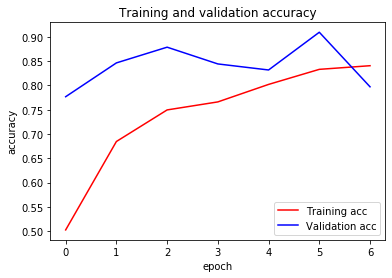

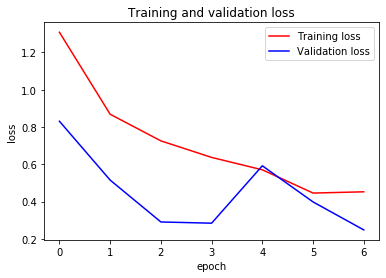

In [23]:
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [43]:

model = load_model('skindisease1.h5')
# model.compile(loss='categorical_crossentropy',
#                       optimizer='adam',
#                       metrics=['accuracy'])

from skimage.transform import resize

def detect(frame):
    try:
        img = resize(frame,(224,224))
        img = np.expand_dims(img,axis=0)
        if(np.max(img)>1):
            img = img/255.0
        prediction = model.predict(img)
        print(prediction)
        prediction = model.predict_classes(img)
        print(prediction)
    except AttributeError:
        print("shape not found")


In [44]:
frame=cv2.imread("C:/Users/Kali Prasad/Desktop/dataset/dataset/Train/psorasis/p10.jpg")
data = detect(frame)

[[9.9297453e-05 3.0656716e-05 9.9944168e-01 4.2821458e-04 1.1795704e-07]]
[2]


In [49]:
frame=cv2.imread("C:/Users/Kali Prasad/Desktop/dataset/dataset/Train/melanoma/g4.jpg")
data = detect(frame)

[[0.2370628  0.2590986  0.17670603 0.1805341  0.14659846]]
[1]


In [50]:
frame=cv2.imread("C:/Users/Kali Prasad/Desktop/dataset/dataset/Train/seborrheic keratosis/ISIC_0000142.jpg")
data = detect(frame)

[[5.1814737e-14 3.7270278e-05 7.6651757e-10 9.9996269e-01 3.7929100e-17]]
[3]


In [47]:
frame=cv2.imread("C:/Users/Kali Prasad/Desktop/dataset/dataset/Train/actinic keratosis/ISIC_0026040.jpg")
data = detect(frame)

[[0.33556792 0.1726142  0.22061227 0.09388291 0.17732263]]
[0]


In [48]:
frame=cv2.imread("C:/Users/Kali Prasad/Desktop/dataset/dataset/Train/vascular lesion/ISIC_0030722.jpg")
data = detect(frame)

[[1.5015107e-14 4.5873346e-17 2.1092765e-16 1.8467455e-10 1.0000000e+00]]
[4]
